<a href="https://colab.research.google.com/github/SamuelMtnz/Amsterdam/blob/main/Amsterdam_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo: Predicción precio de las casas**

Variables:
**Precio: Variable a Predecir**
Dirección
ZIP
Area
Habitaciones
Longitud
Latitud

**Revisión variables y sin análisis.**
Relación positiva esperada en price, rooms, area. Correlación positiva esperada.
Latitud y Longutid para mostrar en mapa.

# **Carga de datos y EDA**

In [ ]:
#@title Carga de datos

#-------------------------------------------
#      Importar librerias necesarias
#-------------------------------------------

import os
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

#-------------------------------------------
#              Carga archivo
#-------------------------------------------

try:
  uploaded = files.upload()

#-------------------------------------------
#           Comprobaciónes archivo
#-------------------------------------------

  if not uploaded:
    raise FileNotFoundError ("⚠️ No se ha seleccionado ningún archivo")

  nombre_archivo = list(uploaded.keys())[0]
  print(f"\n 🔍 Archivo seleccionado: {nombre_archivo}")

  if not nombre_archivo.endswith(".csv"):
    raise ValueError ("❌ El archivo no es un CSV")

#-------------------------------------------
#        Creación DB y verificación
#-------------------------------------------

  df_house = pd.read_csv(nombre_archivo)

  print("\n ✅ Datos cargados correctamente \n📊 Vista previa: ")
  display(df_house.head())

  print("\n🔢 Resumen estadístico básico: ")
  display(df_house.describe())

  # Manejo errores

except FileNotFoundError as e:
  print(f"\n ❌ Error: {str(e)}")
except ValueError as e:
  print(f"\n ❌ Error: {str(e)}")
except pd.errors.EmptyDataError:
  print("\n ❌ El archivo está vacío.")
except pd.errors.ParserError:
  print("\n ❌ Error al leer archivo, revisar formato")
except Exception as e:
  print(f"\n ❌ Error inesperado: {str(e)}")



Saving HousingPrices-Amsterdam-August-2021.csv to HousingPrices-Amsterdam-August-2021.csv

 🔍 Archivo seleccionado: HousingPrices-Amsterdam-August-2021.csv

 ✅ Datos cargados correctamente 
📊 Vista previa: 


Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538


🔢 Resumen estadístico básico: 


Unnamed: 0         Price        Area        Room         Lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888605   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053140   
min      1.000000  1.750000e+05   21.000000    1.000000    4.644819   
25%    231.750000  3.500000e+05   60.750000    3.000000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.000000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.000000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.000000    5.029122   

              Lat  
count  924.000000  
mean    52.363326  
std      0.024028  
min     52.291519  
25%     52.352077  
50%     52.364631  
75%     52.377598  
max     52.423805

# EDA

In [ ]:
#@title Varibles

#-------------------------------------------
#     Información varibles y duplicados
#-------------------------------------------

df_house.info()

rows_duplicated = df_house.duplicated()
n_rows_duplicated = df_house.duplicated().sum()
print(f"\n 📚 Columnas duplicadas: {n_rows_duplicated}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB

 📚 Columnas duplicadas: 0


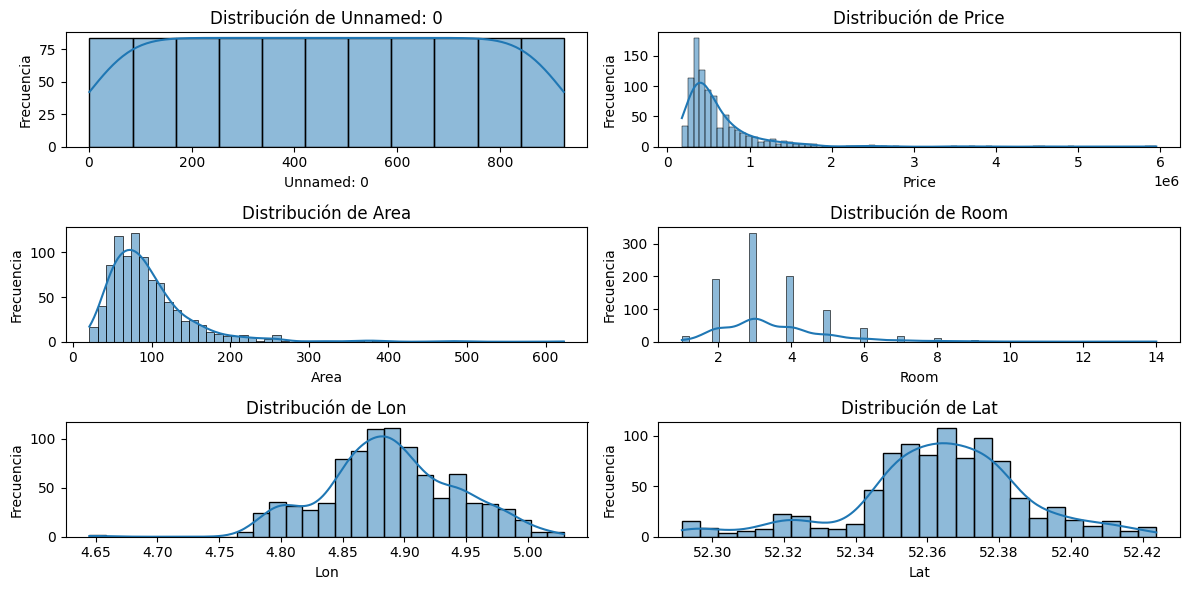

In [ ]:
#@title Descripción gráfica

#-------------------------------------------
#           Descripción Gráfica
#-------------------------------------------

num_columns = df_house.select_dtypes(include = ["float64", "int64"]).columns

plt.figure(figsize = (12,6))

for i, col in enumerate(num_columns, 1):
  plt.subplot(3, 2, i)
  sns.histplot(df_house[col], kde = True)
  plt.title(f"Distribución de {col}")
  plt.xlabel(col)
  plt.ylabel(f"Frecuencia")

plt.tight_layout()
plt.show()

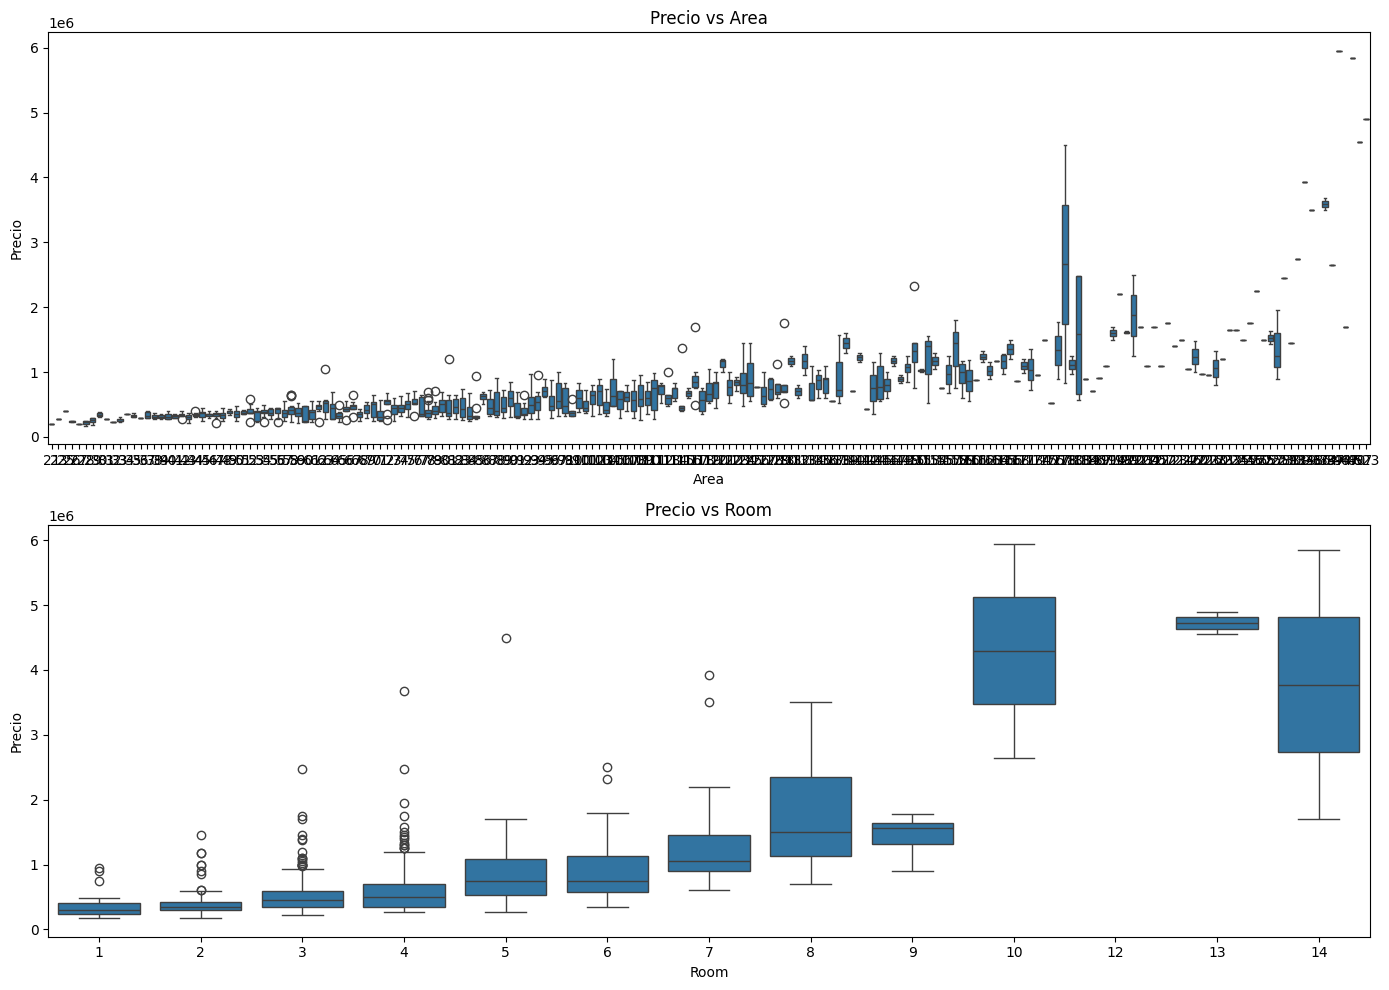

In [ ]:
#-------------------------------------------
#            @title  🔍 Outliers
#-------------------------------------------

var2 = df_house[['Area', 'Room']]

plt.figure(figsize = (14, 10))

for i, col in enumerate(var2.columns, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x = col, y = "Price", data = df_house)
    plt.title(f"Precio vs {col}")
    plt.xlabel(col)
    plt.ylabel("Precio")

plt.tight_layout()
plt.show()


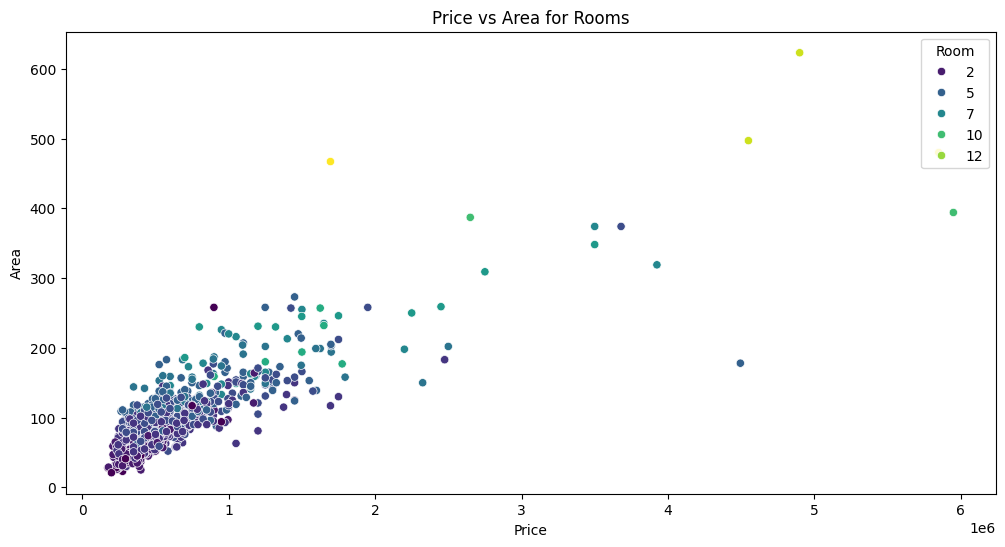

In [ ]:
#-------------------------------------------
#           @title 🔍 Scaterplot
#-------------------------------------------

plt.figure(figsize = (12,6))

sns.scatterplot(x = "Price",
                y = "Area",
                data = df_house,
                hue = "Room",
                palette = "viridis")

plt.title("Price vs Area for Rooms")
plt.xlabel("Price")
plt.ylabel("Area")

plt.legend(title = "Room", loc = "upper right")

plt.show()

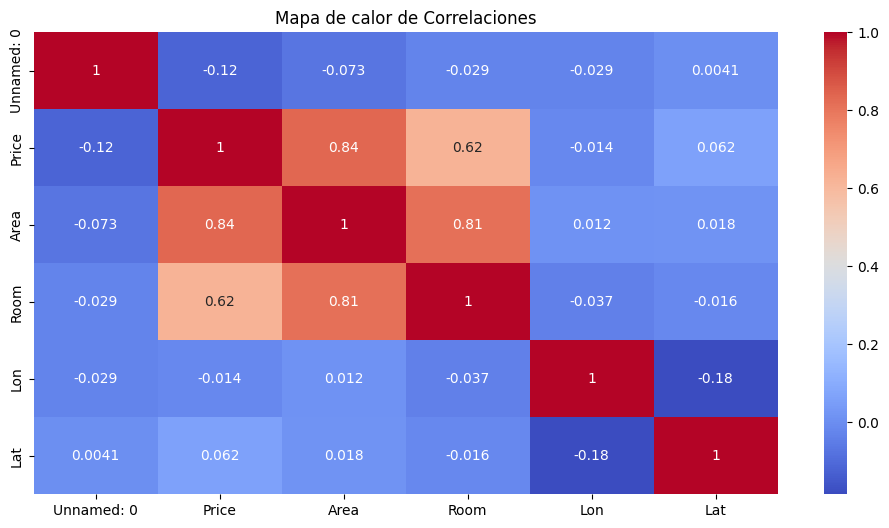

In [ ]:
#-------------------------------------------
#          @title  🔍 Correlaciones
#-------------------------------------------

corr_matrix = df_house.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize = (12, 6))

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Mapa de calor de Correlaciones")

plt.show()

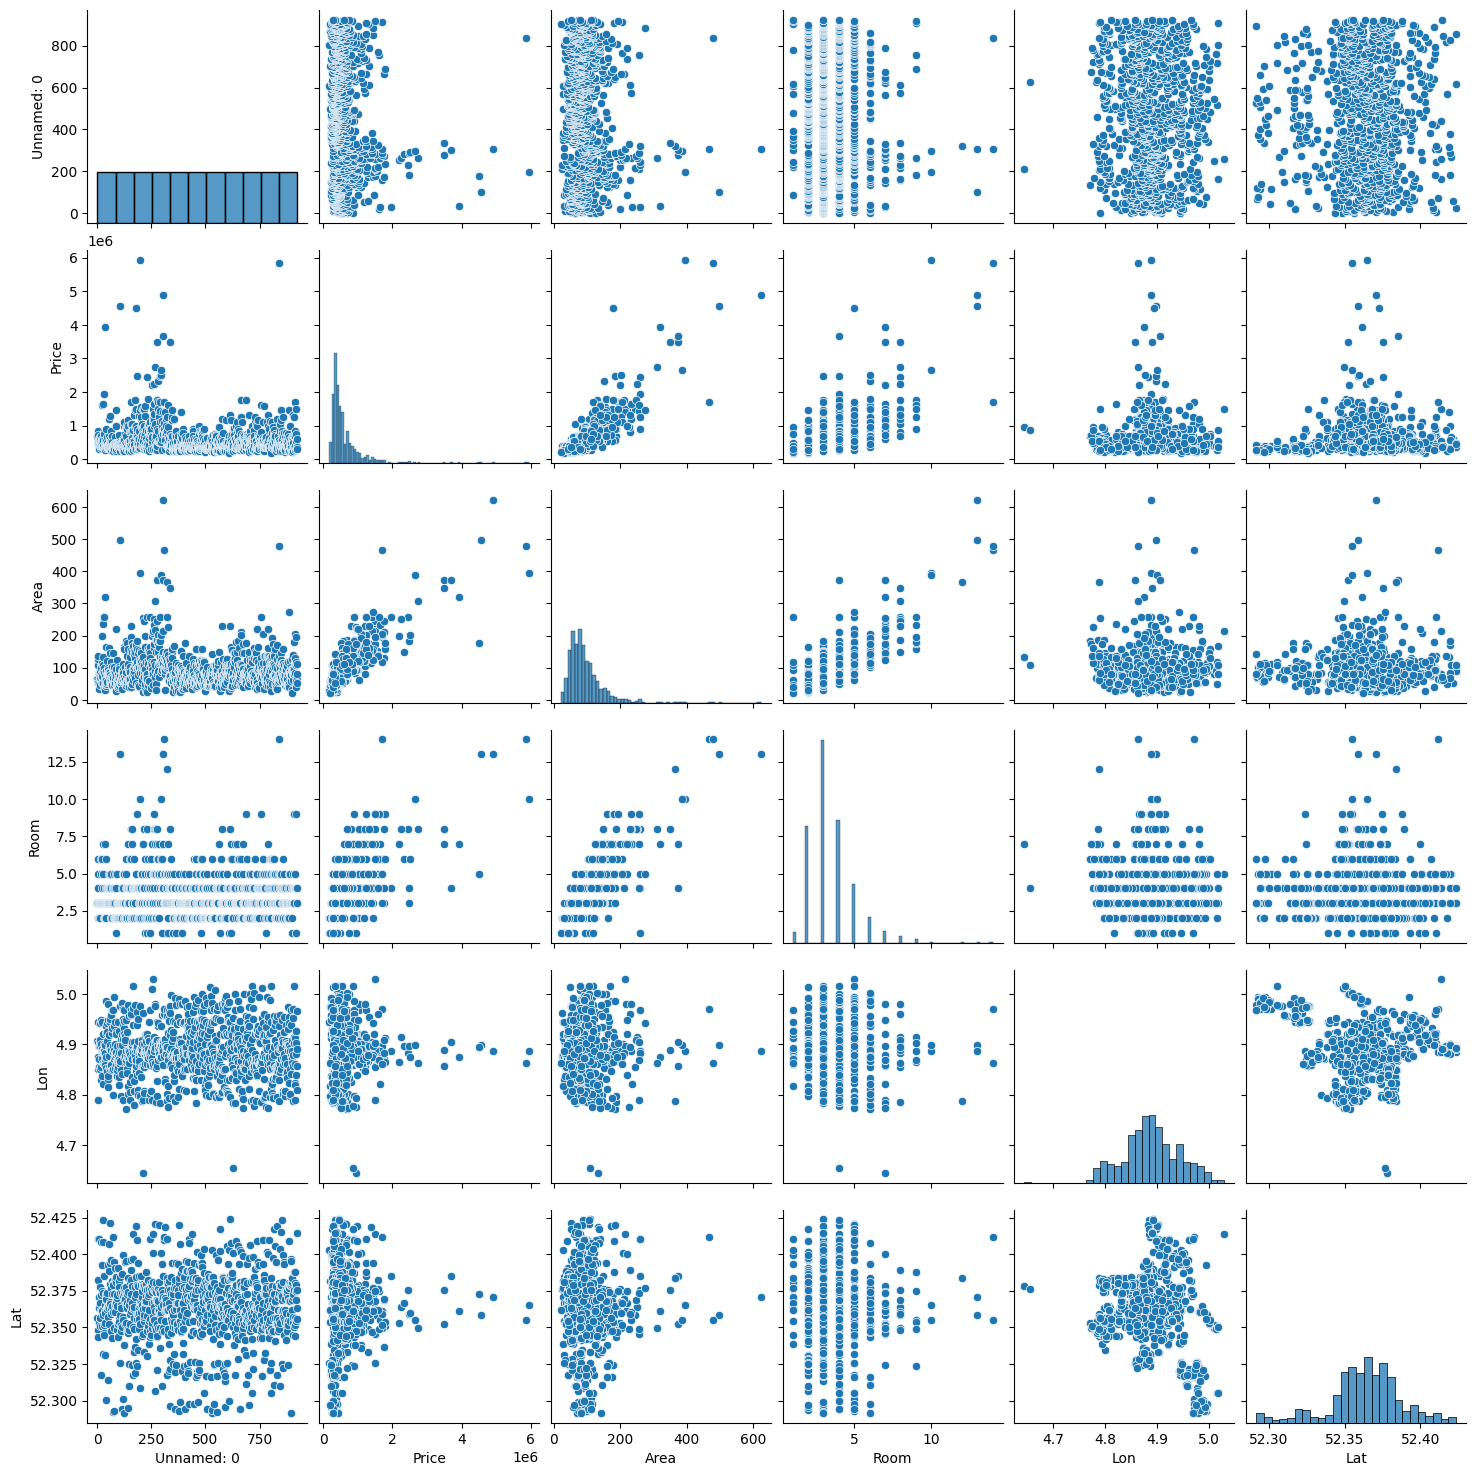

In [ ]:
#-------------------------------------------
#      @title  🔍 Pairpplot
#-------------------------------------------

sns.pairplot(df_house)

plt.show()

In [ ]:
#-------------------------------------------
#      @title  🔍 Ydata
#-------------------------------------------

!pip install ydata-profiling
from ydata_profiling  import ProfileReport


profile_report = ProfileReport(df_house, title = "Reporte EDA", explorative = True)
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 54.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#-------------------------------------------
#    @title  🔍 Skewness - Asimetría
#-------------------------------------------


skewness = skew(df_house["Price"])
print(f"Coeficiente de asimetría: {skewness}")



numeric_cols = df_house.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    print(f"Skewness de {col}: {skew(df_house[col])}")

Coeficiente de asimetría: nan
Skewness de Unnamed: 0: 0.0
Skewness de Price: nan
Skewness de Area: 3.1396973644413273
Skewness de Room: 2.030791958061656
Skewness de Lon: -0.0804263165100731
Skewness de Lat: -0.48516383845440786


Resultado Esperado VS Resultados Obtenidos

✅ Correlaciones positivas
✅ Lon y Lat irrelevantes para el modelo
✅ Outliers


⚠️ 4 null en Precio ⚠️
⚠️ Asimetría positiva en Area y Room

🤔 Pensamos qué hacer con los Outliers, si eliminarlos o trabajamos con ellos